In [1]:
import numpy as np
from math import *
import time
from PIL import Image
from PIL import ImageDraw
from PIL import ImageColor
import IPython.display

In [2]:
def make_graph():
    global x_0, y_0, d, N
    graph = {}
    f = open('graph', 'r')
    for line in f:
        line = line.strip().split(': ')
        graph[int(line[0])] = eval(line[1])
    x_0, y_0 = -2, 2
    d = 0.005
    N = int(4 / d)
    return graph

In [3]:
def invert_graph(graph):
    i_graph = dict.fromkeys(graph.keys(), 0)
    for k, v in graph.items():
        for vertice in v:
            if i_graph[vertice]:
                i_graph[vertice].add(int(k))
            else:
                i_graph[vertice] = {int(k)}
    for k, v in i_graph.items():
        if v == 0:
            i_graph[k] = set()
    return i_graph

In [4]:
def dfs1(v, comp):
    visited[v] = True
    end = True
    for e in graph[v]:
        if not visited[e]:
            end = False
            dfs1(e, comp)
    comp.append(v)

In [5]:
def dfs2(v, comp):
    visited[v] = True
    end = True
    for e in i_graph[v]:
        if not visited[e]:
            end = False
            dfs2(e, comp)
    comp.append(v)

In [6]:
def kosaraju(graph):
    global visited
    global i_graph
    i_graph = invert_graph(graph)
    n = N * N
    
#     visited = [False] * (n + 1)
    visited = dict.fromkeys(graph.keys(), False)
    coms = []
    
    for i in range(1, n + 1):
        if (i in graph.keys() and (not visited[i])):
            comp = []
            dfs1(i, comp)
            coms.append(comp)

#     visited = [False] * (n + 1)
    visited = dict.fromkeys(graph.keys(), False)
    c = []

    for comp in coms[::-1]:
        for v in comp[::-1]:
            if not visited[v]:
                co = []
                root = True
                dfs2(v, co)
#                 if len(co) > 1:
                c.append(co)                    
    return c

In [7]:
def scale(x, y):
    return (x + 2) * width // 4 , height - (y + 2) * height // 4

def fill_square(number, d, color):
    y, x = divmod(number - 1, N)
    x, y = x_0 + x * d, y_0 - y * d
    draw.rectangle((*scale(x, y), *scale(x + d, y - d)), fill=color)
    
def draw_grid():
    x, y = 0, 0
    if d > 0.01:
        while x < width:
            x += width / N
            draw.line((x, 0, x, height), fill=ImageColor.getrgb("blue"))
        while y < height:
            y += height / N
            draw.line((0, x, width, x), fill=ImageColor.getrgb("blue"))
            
def draw_axis():
    zero_x = width / 2
    zero_y = height / 2

    draw.line((0, zero_x + 1, height, zero_x + 1))
    draw.line((zero_y + 1, 0, zero_y + 1, width))

In [8]:
def draw_scc(scc, attr_reg, grid=False, axis=False, save=True):
    global height, width, draw, cntr, cntr_edges
    height, width = 800, 800
    image = Image.new("RGB", (width, height))
    draw = ImageDraw.Draw(image)
    draw.rectangle((0, 0, width, height), fill='white')
  
    for c in attr_reg:
        fill_square(c, d, 'pink') 
    for c in scc:
        fill_square(c, d, 'purple')     

    if axis:
        draw_axis()

    if grid:
        draw_grid()

    if save:
        im_name = 'image5_2' + str(N * N) + '.png'
        image.save(im_name, "PNG")

In [9]:
def func():
    global graph, scc, was
    start = time.time()
    graph = make_graph()
#     nums = topo(graph)
#     scc = kosaraju(graph)
#     g_time = time.time() - start
    draw_scc(scc)

In [11]:
%%time
graph = make_graph()

Wall time: 27.5 s


In [12]:
%%time
scc = kosaraju(graph)

Wall time: 10.4 s


Wall time: 1.87 s


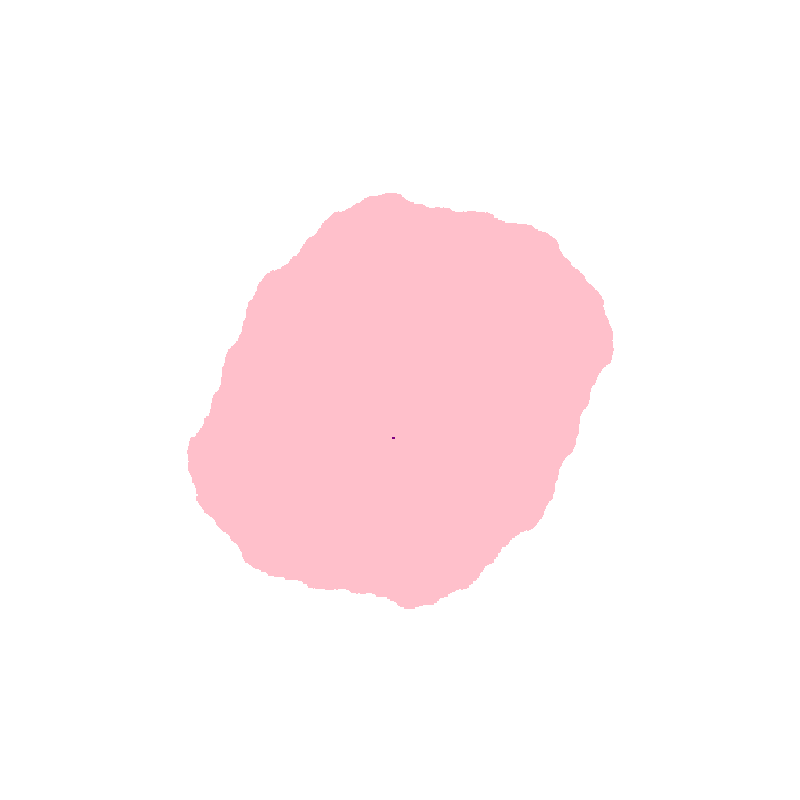

In [21]:
%%time
draw_scc(short_scc, attr_reg)
IPython.display.Image(filename='image5_2' + str(N * N) + '.png') 

In [18]:
short_scc = []
for c in scc:
    if (len(c) > 1) and (len(c) < 10):
        short_scc += c

In [19]:
len(short_scc)

3

In [9]:
def dfs3(v, attr_reg):
    visited[v] = True
    for e in i_graph[v]:
        if not visited[e]:
            dfs3(e, attr_reg)
    attr_reg.append(v)

In [10]:
def get_attr(graph, scc):
    global visited
    visited = dict.fromkeys(graph.keys(), False)
    attr_reg = []
    
#     for v in scc:
#         visited[v] = True

    for v in scc:
        dfs3(v, attr_reg)
#         attr_reg.remove(v)

    return attr_reg

In [14]:
def dfs4(v, attr):
    visited[v] = True
    for e in graph[v]:
        if not visited[e]:
            dfs4(e, attr)
    attr.append(v)

In [15]:
def get_attr2(graph, scc):
    global visited
    visited = dict.fromkeys(graph.keys(), False)
    attr = []
    
    for v in scc:
        visited[v] = True

    for v in scc:
        dfs4(v, attr)

    return attr

In [22]:
len(attr_reg)

124030

In [18]:
%%time
attr = get_attr2(graph, short_scc)

Wall time: 1.24 s


In [20]:
%%time
attr_reg = get_attr(graph, short_scc)

Wall time: 486 ms


In [119]:
for v in short_scc:
    if v in attr_reg:
        print('oh no')

KeyboardInterrupt: 